In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

#from nose.tools import *

import os
os.environ['PROJ_LIB'] = 'C:/Users/USERNAME/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'

from mpl_toolkits.basemap import Basemap


from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

# School Fire Cases in Sweden and KPIs
## What KPIs effect most the number of school fire cases and could we predict a school fire

*Author: Sashka Ignatova, Software University, Sofia, ignatovasashka@gmail.com*

#### Abstract
Sweden has a surprisingly large number of school fires for a small country (< 10M inhabitants), and many of these fires are due to arson. For instance, according to the Division of Fire Safety Engineering at Lund University, "Almost every day between one and two school fires occur in Sweden. In most cases arson is the cause of the fire." The associated costs can be up to a billion SEK (around 120 million USD) per year.

It is hard to say why these fires are so common in Sweden compared to other countries, and this dataset doesn't address that question - but could it be possible, within a Swedish context, to find out which properties and indicators of Swedish towns (municipalities, to be exact) might be related to a high frequency of school fires?


#### Key words 
school, fire, KPI

### 1. Research Questions and Hypothesis
Most school fire cases occur in big cities with more popuation.

### 2. Data and Privacy
Data is collected by [Mikael Huss](https://twitter.com/mikaelhuss) and published to [Kaggle](https://www.kaggle.com/mikaelhuss/swedish-school-fires) and indicates the school fires reported in Swedish municipalities over last few years. This is coupled with some predictors for the towns over the same years, with aim to see if some predictors associate with an increase in school fires.

Data on school fire cases in Sweden between 1998 and 2014 is collected through a web site with official statistics from the Swedish Civil Contingencies Agency (https://ida.msb.se/ida2#page=a0087). At least at the time when the data was collected, there was no API to allow easy access to schools fire data, so a quasi-manual process is used, downloading XLSX report generated from the database year by year, after which joined these with an R script into a single table of school fire cases where the suspected reason was arson. (Full details on the data acquisition process are [available](https://github.com/hussius/swedish-school-fires).)

The number of such cases is reported for each municipality (of which there are currently 290) and year (i e each row is a unique municipality/year combination). The population at the time is also reported.

KPIs were extracted from [Kolada](https://www.kolada.se/) (a database of Swedish municipality and county council statistics) by repeatedly querying its API (https://github.com/Hypergene/kolada).

Extra information was acquired from the website of [Svenska Transport Analysis](https://www.trafa.se/en/road-traffic/vehicle-statistics/).

Data about simplified municipality KPIs is provided by [Jens Finnäs](https://github.com/jensfinnas) here: https://github.com/jensfinnas/Election-night-at-Aftonbladet

* code: Administrative code of the municipality
* name: Name of the municipality
* medianIncome: Disposable median net income persons 20 years and older. Net income is the sum of all taxable and tax-free income such as earned and capital income and transfers minus tax and other negative transfers. Income is calculated per individual. Income directed to the whole household, such as financial assistance and housing support, has, where applicable, been divided among the adults in the household, mean for the period 2010-2013, SEK
* youthUnemployment2010, youthUnemployment2013: Number of residents 16-24 years who are openly unemployed or in programs with activity support, divided by number of residents 16-24 years, %
* unemployment2010, unemployment2013: Number of residents 18-64 years who are openly unemployed or in programs with activity support divided by number of residents 18-64 years, %
* unemploymentChange: Change in unemployment percents 2013 - 2010
* reportedCrime: Number of reported crimes per 100 000 inhabitants
* populationChange: Population change 2013 - 2010, %
* hasEducation: Residents with post-secondary education 25-64 years, %. Post-secondary education refers to: post-secondary education shorter than 3 years, longer than 3 years and postgraduate education
* asylumCosts: Asylum costs, SEK
* urbanDegree: Percentage (%) of the population living in urban areas. A collection of houses with at least 200 inhabitants is counted as an urban area
* satisfactionInfluence	satisfactionGeneral	satisfactionElderlyCare, % 
* foreignBorn: Foreign-born aged 18-64 in the municipality, %
* reportedCrimeVandalism: The crime category crime of vandalism includes "damage / gross damage / damage to motor vehicle (not fire), through fire (including motor vehicle), graffiti, against state, municipality, region (not graffiti), other vandalism" and "arson / aggravated arson", number per 1 000 inhabitants
* youngUnskilled: Young unskilled, % 
* latitude
* longitude
* population: population, number
* populationShare65plus: People 65 years old and above, %
* municipalityType: 'Larger towns', 'Commuter municipalities', 'Sparsely populated municipalities', 'Tourism municipalities', 'Suburbs to larger towns', 'Manufacturing municipalities', 'Municipalities in sparsely populated regions', 'Municipalities in densely populated regions', 'Suburbs to cities', 'Cities'
* municipalityTypeBroad: 'Town', 'Rural', 'City'
* refugees: The foreign citizens who have been granted a residence permit in Sweden as refugees, in need of protection, according to extremely painful circumstances or as relatives, %
* rentalApartments: Average area for rented premises, sqm
* governing: 'Conservative', 'Mixed', 'Left-wing'
* fokusRanking: Refers to results for students in municipal schools located in the municipality. The reported result is the municipality's position among the country's 290 municipalities(low values show good results)
* foretagsklimatRanking: Municipal ranking (1-290) of the entrepreneurs' summary assessment of the business climate in the municipality. What is reported is the ranking according to the question "what summary assessment do you want to give your municipality?" in the questionnaire part of the Confederation of Swedish Enterprise's survey where entrepreneurs are asked about their views on the municipality's ability to create a good business climate
* cars: number of cars on 1000 inhabitants in the municipality ((number of cars/population)*1000)
* motorcycles: number of motorcycles on 1000 inhabitants in the municipality ((number of motorcycles/population)*1000)
* tractors: number of tractors on 1000 inhabitants in the municipality ((number of tractors/population)*1000)
* snowmobiles: number of snowmobiles on 1000 inhabitants in the municipality ((number of snowmobiles/population)*1000)

### 3. Related Research

http://www.nxn.se/valent/2016/9/6/wioi51hctmmjheez5s0fsvygfiiois

https://ida.msb.se/ida2#page=c2a7aea1-1ca6-43c2-9fb1-84f1bf0b5e6e

https://www.kolada.se/verktyg/fri-sokning/

http://www.rka.nu/

https://books.google.bg/books?id=DvCR-sIH56UC&pg=PA57&lpg=PA57&dq=bjurholm+refugees&source=bl&ots=iETTc-Imt3&sig=ACfU3U1DBzD70LwxS-aQk6xIFKIpbWQMdw&hl=bg&sa=X&ved=2ahUKEwja05vLwLzsAhVs8OAKHWCcACgQ6AEwCHoECAUQAg#v=onepage&q=bjurholm%20refugees&f=false

### 4. Reading Data and Data Cleaning

Data is read from the following files `school_fire_cases_1998_2014.csv` and `simplified_municipality_indicators.csv`.

In [3]:
fires = pd.read_csv("data/school_fire_cases_1998_2014.csv")
fires

,Municipality,Cases,Population,Year
0,Ale,0,25292,1998
1,Alingsås,0,34930,1998
2,Alvesta,0,19171,1998
3,Aneby,0,6806,1998
4,Arboga,0,14070,1998
...,...,...,...,...
4919,Österåker,0,41180,2014
4920,Östhammar,0,21374,2014
4921,Östra Göinge,0,13864,2014
4922,Överkalix,0,3409,2014


In [4]:
indicators = pd.read_csv("data/simplified_municipality_indicators.csv")
indicators

,code,name,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,unemployment2013,unemploymentChange,reportedCrime,populationChange,...,municipalityTypeBroad,refugees,rentalApartments,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles
0,780,Växjö,201793,9.3,8.7,7.9,8.0,0.1,831,0.8,...,Town,33.8,234.1,Conservative,19,24,3651.694532,200.542250,260.370538,4.609128
1,1487,Vänersborg,195999,13.7,13.2,9.5,9.4,-0.1,641,2.7,...,Rural,14.4,164.8,Mixed,80,231,2230.455552,138.180123,226.960270,8.155657
2,1765,Årjäng,182826,6.4,5.5,7.2,5.3,-1.9,575,-3.5,...,Rural,11.2,129.1,Conservative,204,113,765.670911,46.767875,183.031342,11.263467
3,1293,Hässleholm,237817,10.4,13.1,9.1,9.6,0.5,751,3.9,...,Town,13.2,136.9,Conservative,83,187,1311.598558,103.215144,181.189904,0.951522
4,2403,Bjurholm,168796,7.1,11.5,6.7,10.2,3.5,205,-3.2,...,Rural,52.0,87.6,Conservative,266,38,565.270936,38.177340,176.518883,186.781609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,180,Stockholm,234360,3.8,4.2,5.3,5.4,0.1,1776,10.8,...,City,15.9,223.0,Conservative,1,22,359.089896,13.233820,2.625599,1.910438
286,126,Huddinge,222313,4.2,4.6,5.9,5.9,0.0,1319,8.9,...,City,17.3,130.7,Conservative,9,103,347.874840,22.290044,2.593680,2.691186
287,123,Järfälla,227460,3.8,5.0,5.6,6.9,1.3,1105,7.5,...,City,18.7,110.8,Conservative,10,59,379.805399,19.517978,2.515651,3.021672
288,138,Tyresö,239204,3.5,5.3,3.7,4.4,0.7,942,4.6,...,City,5.5,88.5,Conservative,35,43,370.971749,28.251395,2.506718,3.839118


In [5]:
indicators.columns

Index(['code', 'name', 'medianIncome', 'youthUnemployment2010',
       'youthUnemployment2013', 'unemployment2010', 'unemployment2013',
       'unemploymentChange', 'reportedCrime', 'populationChange',
       'hasEducation', 'asylumCosts', 'urbanDegree', 'satisfactionInfluence',
       'satisfactionGeneral', 'satisfactionElderlyCare', 'foreignBorn',
       'reportedCrimeVandalism', 'youngUnskilled', 'latitude', 'longitude',
       'population', 'populationShare65plus', 'municipalityType',
       'municipalityTypeBroad', 'refugees', 'rentalApartments', 'governing',
       'fokusRanking', 'foretagsklimatRanking', 'cars', 'motorcycles',
       'tractors', 'snowmobiles'],
      dtype='object')

In [6]:
indicators.dtypes

code                         int64
name                        object
medianIncome                 int64
youthUnemployment2010      float64
youthUnemployment2013      float64
unemployment2010           float64
unemployment2013           float64
unemploymentChange         float64
reportedCrime                int64
populationChange           float64
hasEducation               float64
asylumCosts                  int64
urbanDegree                float64
satisfactionInfluence       object
satisfactionGeneral         object
satisfactionElderlyCare     object
foreignBorn                float64
reportedCrimeVandalism     float64
youngUnskilled             float64
latitude                   float64
longitude                  float64
population                   int64
populationShare65plus      float64
municipalityType            object
municipalityTypeBroad       object
refugees                   float64
rentalApartments           float64
governing                   object
fokusRanking        

In [7]:
fires.dtypes

Municipality    object
Cases            int64
Population       int64
Year             int64
dtype: object

Surprisingly I found some mismatch in the `Population` column of the two files. Below are described the municipalities with mismatch. 

In [8]:
only_2013 = fires[fires["Year"] == 2013]
only_2013 = only_2013.sort_values(by = ["Municipality"])
only_2013 = only_2013.reset_index()
only_2013

,index,Municipality,Cases,Population,Year
0,4344,Ale,1,28074,2013
1,4345,Alingsås,0,38619,2013
2,4346,Alvesta,1,19280,2013
3,4347,Aneby,0,6375,2013
4,4348,Arboga,0,13493,2013
...,...,...,...,...,...
285,4629,Österåker,0,40495,2013
286,4630,Östhammar,0,21352,2013
287,4631,Östra Göinge,0,13687,2013
288,4632,Överkalix,0,3436,2013


In [9]:
indicators = indicators.sort_values(by = ["name"])
indicators = indicators.reset_index()

In [10]:
only_2013["Population"].equals(indicators["population"])

False

In [11]:
difference = only_2013.Population - indicators.population

In [12]:
compare_table = only_2013.loc[difference.to_numpy().nonzero()]
compare_table["indicator_population"] = indicators.iloc[difference.to_numpy().nonzero()].population

Let's check only columns with population and drop other columns:

In [13]:
compare_table.drop(["index","Cases", "Year"], axis = 1)

,Municipality,Population,indicator_population
77,Hällefors,6982,10281
78,Härjedalen,10281,24509
79,Härnösand,24509,35732
80,Härryda,35732,50227
81,Hässleholm,50227,19968
82,Håbo,19968,6982
257,Vänersborg,37369,8583
258,Vännäs,8583,39784
259,Värmdö,39784,33155
260,Värnamo,33155,35867


They seem to be consecutive as being sorted by name, so I would assume it is due to a manual mistake. Comparing the data with [The Statistics Sweden Site](https://kommunsiffror.scb.se/?id1=1401&id2=null) shows that population data in `school_fire_cases_1998_2014.csv` is correct. 

In our personal communication with the [data author](https://twitter.com/mikaelhuss) also confirmed that the correct population figures should be in the N01951 indicator. Thus I could feel free use population data for 2013 in `school_fire_cases_1998_2014.csv`. 

In [14]:
indicators.population = only_2013.Population

The analysis will be held on `indicators` file, so the data in it would be cleaned. The columns `satisfactionInfluence`, `satisfactionGeneral` and `satisfactionElderlyCare` does not represent valuable data, as there are many "NA" values. Also columns `index` and `code` would not be usefull for analytics. Columns are dropped.

In [15]:
indicators = indicators.drop(["index", "code", "satisfactionInfluence", "satisfactionGeneral", "satisfactionElderlyCare"], axis = 1)

A new column `fireCases` is added to the dataset - this is data for cases from 2010 to 2013 in the column `Cases` from `school_fire_cases_1998_2014.csv`.

In [16]:
cases_after_2010 = fires[fires["Year"] >= 2010]
cases2010to2013 = cases_after_2010[cases_after_2010["Year"] < 2014]
cases2010to2013 = cases2010to2013.drop(["Population", "Year"], axis = 1)
cases2010to2013 = cases2010to2013.groupby(["Municipality"]).sum()
cases2010to2013 = cases2010to2013.sort_values(by = ["Municipality"])
cases2010to2013 = cases2010to2013.reset_index()

In [17]:
indicators["fireCases"] = cases2010to2013["Cases"]

It would be valuable to have columns for cases in each year 2010 and 2013 as we have KPIs described for each year in the data. So column `fireCases2010` and `fireCases2013` are added. We already extracted cases in 2013 in `only_2013`. Same procedure is applied for 2010.

In [18]:
only_2010 = fires[fires["Year"] == 2010]
only_2010 = only_2010.sort_values(by = ["Municipality"])
only_2010 = only_2010.reset_index()
indicators["fireCases2010"] = only_2010["Cases"]
indicators["fireCases2013"] = only_2013["Cases"]
indicators = indicators.set_index('name')
indicators

,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,unemployment2013,unemploymentChange,reportedCrime,populationChange,hasEducation,asylumCosts,...,governing,fokusRanking,foretagsklimatRanking,cars,motorcycles,tractors,snowmobiles,fireCases,fireCases2010,fireCases2013
name,,,,,,,,,,,,,,,,,,,,,
Ale,218334,8.5,7.3,6.8,5.5,-1.3,691,2.7,31.5,486,...,Mixed,61,61,482.296787,38.434138,29.778443,1.781007,2,0,1
Alingsås,206737,9.4,8.8,7.4,6.3,-1.1,862,3.7,39.2,653,...,Conservative,48,173,476.941402,38.452575,39.669593,1.346487,1,1,0
Alvesta,198482,11.7,13.1,7.9,8.9,1.0,654,2.7,27.7,1591,...,Mixed,126,179,539.885892,37.396266,76.970954,0.881743,2,1,1
Aneby,192114,10.1,10.5,7.4,6.6,-0.8,831,-2.3,28.4,2041,...,Conservative,187,89,560.313725,48.156863,136.000000,1.254902,0,0,0
Arboga,189118,14.4,11.2,10.1,8.9,-1.2,726,1.4,30.2,203,...,Mixed,190,196,523.011932,37.352701,52.101089,6.225450,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Österåker,241201,5.2,4.2,3.8,3.5,-0.3,773,4.6,40.4,283,...,Conservative,71,37,448.228176,28.768984,10.445734,6.420546,1,0,0
Östhammar,202320,5.9,7.0,4.6,4.5,-0.1,773,-0.4,25.3,554,...,Mixed,92,154,542.525290,47.958037,94.698389,17.375422,3,1,0
Östra Göinge,186964,10.6,12.9,9.8,9.8,0.0,1074,0.2,23.1,639,...,Mixed,215,209,547.526850,48.001753,60.641485,0.146124,0,0,0


In [19]:
indicators["fireCases"].unique()

array([ 2,  1,  0,  3,  7,  6, 15,  4,  9,  5, 91, 40,  8, 13, 14, 19, 11,
       42, 18, 36, 20, 10], dtype=int64)

### 5. Data Exploration

First of all let's see a histogram of the fire cases below:

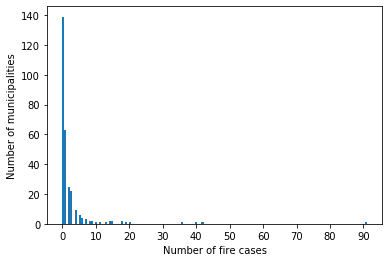

In [91]:
plt.hist(indicators["fireCases"], bins = "fd")
plt.xticks(range(0, 100, 10))
plt.xlabel('Number of fire cases')
plt.ylabel('Number of municipalities')
plt.show()

A little bit of zooming to the small numbers would be informative too:

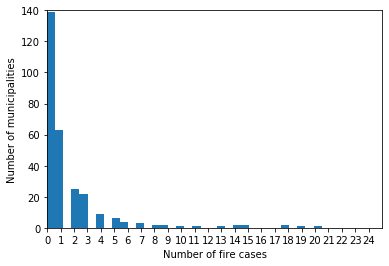

In [93]:
plt.hist(indicators["fireCases"], bins = "fd")
plt.axis([0, 25, 0, 140])
plt.xticks(range(0, 25, 1))
plt.xlabel('Number of fire cases')
plt.ylabel('Number of municipalities')
plt.show()

Most of the observed municipalities got 5 or less fire cases for the period 2010 to 2013.

It would be nice to see the corelations between all features.

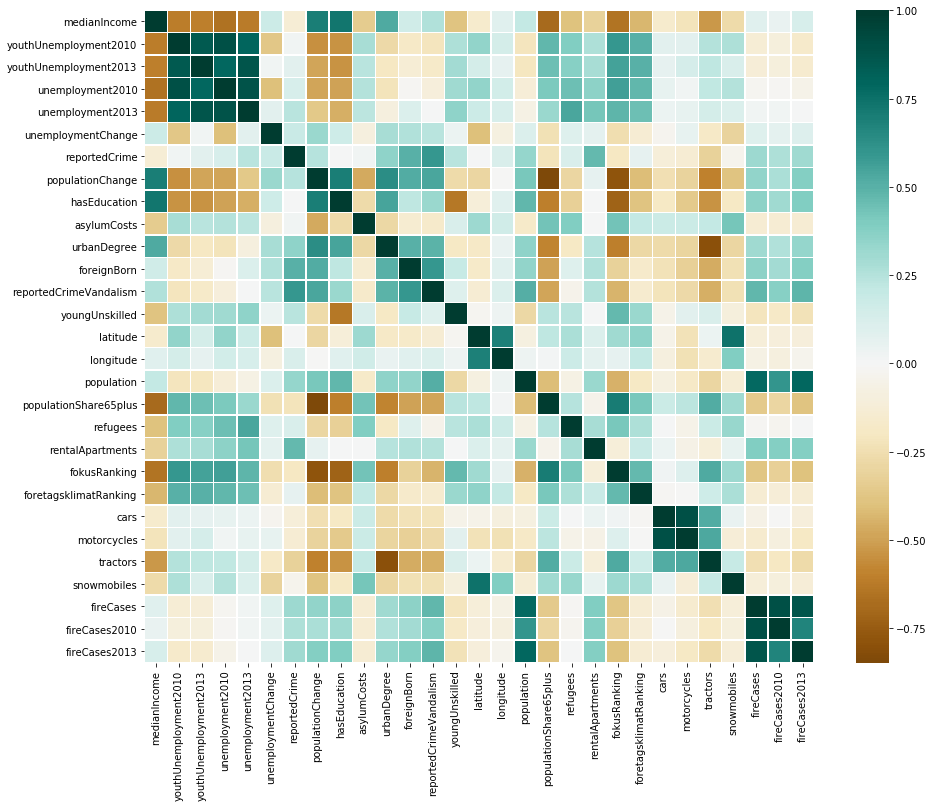

In [20]:
indicators_features_list = indicators.columns
cor_mat = indicators.loc[:, indicators_features_list].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cor_mat, linewidths=.5, ax=ax, cmap="BrBG", center = 0)
plt.show()

It is funny to see that `latitude` is strongly correlating to `snowmobiles`, also it is expected `tractors` to correlate to `urbanDegree`. Logically `medianIncome` is correlating with `hasEducation`, `populationShare65plus` and unemployment.
For the current analysis the correlation between `population` and `fireCases` would be interesting.

We need to get indicator (dummy) variables for all categorical columns to see more detailed correlations.

In [21]:
indicators_dummies = pd.get_dummies(indicators)

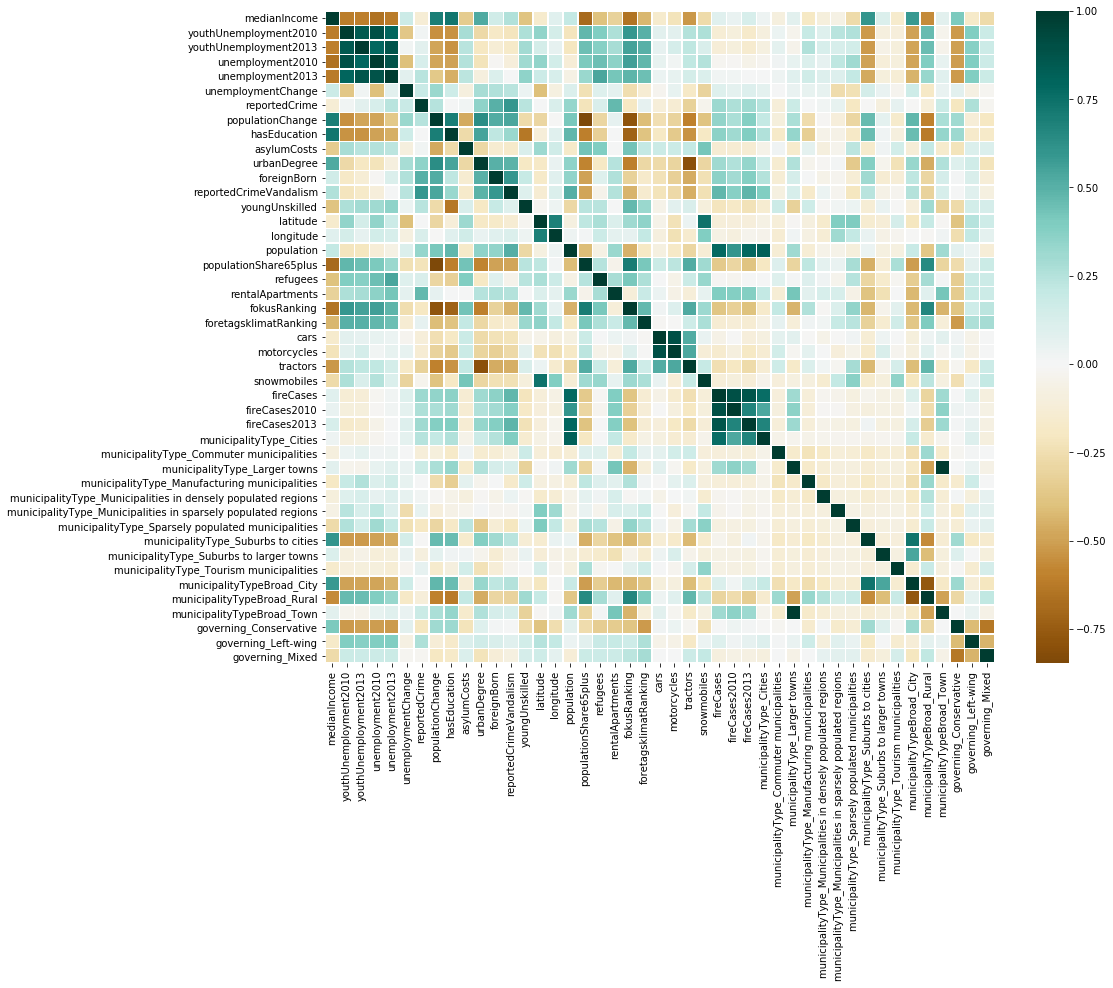

In [22]:
indicators_features_list_dummy = indicators_dummies.columns
cor_mat_dummy = indicators_dummies.loc[:, indicators_features_list_dummy].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cor_mat_dummy, linewidths=.5, ax=ax, cmap="BrBG", center = 0)
plt.show()

We need to notice that `fireCases` strongly correlates to `municipalityType_Cities` which is actually related to the population.

Let's see a graphic of the fire cases towards population as a whole.

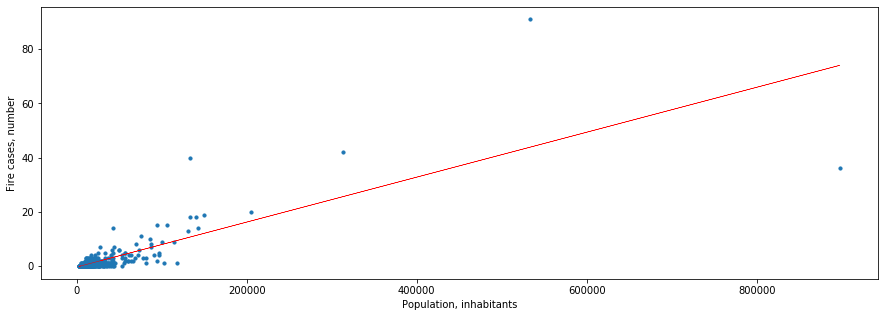

In [27]:
plt.figure(figsize=(15, 5))

x = indicators["population"]
y = indicators["fireCases"]
plt.scatter(x, y, s=10, marker='o')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r-", lw = 0.5)

plt.xlabel('Population, inhabitants')
plt.ylabel('Fire cases, number')
plt.show()

Characteristics of the trendline, charted by `poly1d`:

In [28]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("Slope: ", slope)         #Slope of the regression line.
print("Intercept: ", intercept) #Intercept of the regression line.
print("R-value: ", r_value)     #Caution: r_value here is a Pearson's correlation coefficient, not R-squared. 
                                    #r_squared = r_value**2
print("R\u00b2:", r_value**2)   #Coefficient of determination
print("p-value: ", p_value)     #Two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero, 
                                #using Wald Test with t-distribution of the test statistic.
print("Standard error: ", std_err) #Standard error of the estimated gradient.

Slope:  8.287192365466747e-05
Intercept:  -0.3423739071298302
R-value:  0.7815168861068018
R²: 0.6107686432700719
p-value:  5.8601039739498316e-61
Standard error:  3.898313123404313e-06


Let's zoom a bit more to see the small numbers:

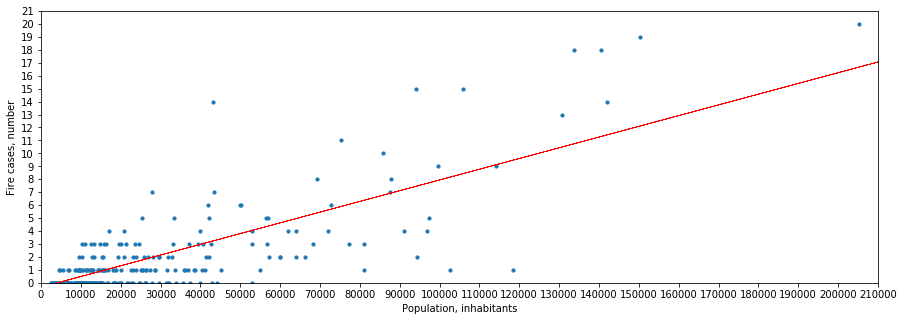

In [29]:
plt.figure(figsize=(15, 5))

x = indicators["population"]
y = indicators["fireCases"]
plt.scatter(x, y, s=10, marker='o')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r-", lw = 0.5)

plt.xlabel('Population, inhabitants')
plt.ylabel('Fire cases, number')
plt.axis([0, 210_000, 0, 20])
plt.xticks(range(0, 220_000, 10_000))
plt.yticks(range(0, 22, 1))
plt.show()

I feel curious to see which are the municipalities with maximum fire cases for the period 2010 to 2013.

In [23]:
max_cases_sort = indicators_dummies.sort_values(by = ["fireCases"], ascending=False)

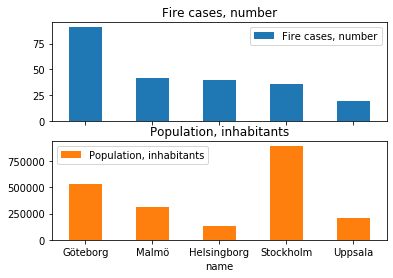

In [24]:
index = max_cases_sort.head().index
df = pd.DataFrame({'Fire cases, number': max_cases_sort["fireCases"].head(),
                   'Population, inhabitants': max_cases_sort["population"].head()}, index=index)
ax = df.plot.bar(subplots=True, rot=0)

We could explore on map the distribution of municipalities where school fires have occured.

In [25]:
indicators_have_cases = indicators[indicators.fireCases != 0]
indicators_have_cases = indicators_have_cases.sort_values(by = ["fireCases"], ascending=False)

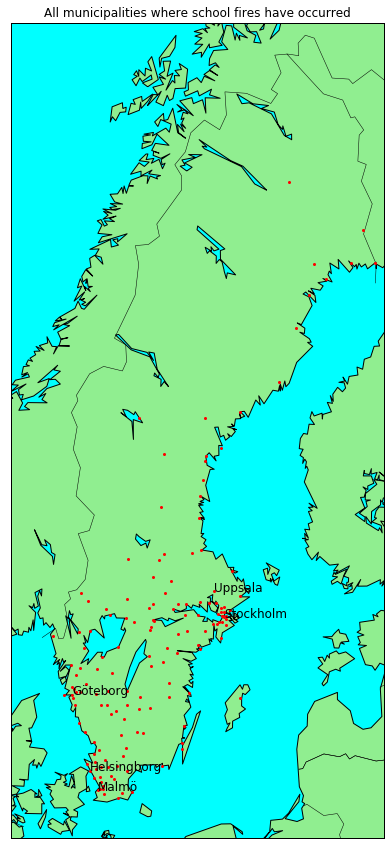

In [26]:
plt.figure(figsize = (12, 15))
m = Basemap(projection = "merc", resolution='l', area_thresh=250, llcrnrlat = 54.5, llcrnrlon = 9.5, urcrnrlat = 69.5, urcrnrlon = 24.5)
x, y = m(indicators_have_cases.longitude.tolist(), indicators_have_cases.latitude.tolist())
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = "lightgreen", lake_color = "aqua")
m.drawmapboundary(fill_color = "aqua")
m.plot(x, y, "o", color = "red", markersize = 2)
for label, xpt, ypt in zip(indicators_have_cases.head().index, x, y): # add annotation (top 5 fire cases city names)
   plt.text(xpt, ypt, label, color = 'black', fontsize = 12)
plt.title("All municipalities where school fires have occurred")
plt.show()

### 6. Model

From now on it would be more valuable to work with the dummies, so we will overwrite `indicators` with `indicators_dummies` for more convenient work. We need to separate explanatory attributes from target. Columns `fireCases2010` and `fireCases2013` are directly connected with the target `fireCases`, so we need to drop them from attributes, too.

In [30]:
indicators = indicators_dummies

In [31]:
indicators_target = indicators["fireCases"]
indicators_attributes = indicators.drop(["fireCases", "fireCases2010", "fireCases2013"], axis = 1)

The dataset contains features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem. So we need to normalize our dataset first. When dealing with features with hard boundaries it is quite useful to use `MinMaxScaler()` that produces values of range [0,1], reserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. Note that MinMaxScaler doesn't reduce the importance of outliers $^{[6]}$. 

In [32]:
scaler = MinMaxScaler()

In [33]:
indicators_attributes_scaled = scaler.fit_transform(indicators_attributes)

In [34]:
indicators_attributes_scaled

array([[0.38475778, 0.29083665, 0.32105263, ..., 0.        , 0.        ,
        1.        ],
       [0.3015512 , 0.32669323, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.24232293, 0.41832669, 0.62631579, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.15968316, 0.37450199, 0.61578947, ..., 0.        , 0.        ,
        1.        ],
       [0.05751349, 1.        , 0.75789474, ..., 0.        , 0.        ,
        1.        ],
       [0.0777824 , 0.51792829, 0.55789474, ..., 0.        , 0.        ,
        1.        ]])

We would like to keep the column names in our dataset, so we would overwrite it as follows:

In [35]:
indicators_attributes = pd.DataFrame(indicators_attributes_scaled, index=indicators_attributes.index, columns=indicators_attributes.columns)
indicators_attributes

,medianIncome,youthUnemployment2010,youthUnemployment2013,unemployment2010,unemployment2013,unemploymentChange,reportedCrime,populationChange,hasEducation,asylumCosts,...,municipalityType_Sparsely populated municipalities,municipalityType_Suburbs to cities,municipalityType_Suburbs to larger towns,municipalityType_Tourism municipalities,municipalityTypeBroad_City,municipalityTypeBroad_Rural,municipalityTypeBroad_Town,governing_Conservative,governing_Left-wing,governing_Mixed
name,,,,,,,,,,,,,,,,,,,,,
Ale,0.384758,0.290837,0.321053,0.292517,0.309091,0.454545,0.314159,0.444043,0.225092,0.031903,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Alingsås,0.301551,0.326693,0.400000,0.333333,0.381818,0.477273,0.422250,0.480144,0.367159,0.042710,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Alvesta,0.242323,0.418327,0.626316,0.367347,0.618182,0.715909,0.290771,0.444043,0.154982,0.103410,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Aneby,0.196634,0.354582,0.489474,0.333333,0.409091,0.511364,0.402655,0.263538,0.167897,0.132531,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Arboga,0.175138,0.525896,0.526316,0.517007,0.618182,0.465909,0.336283,0.397112,0.201107,0.013590,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Österåker,0.548825,0.159363,0.157895,0.088435,0.127273,0.568182,0.365992,0.512635,0.389299,0.018767,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Östhammar,0.269860,0.187251,0.305263,0.142857,0.218182,0.590909,0.365992,0.332130,0.110701,0.036304,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
Östra Göinge,0.159683,0.374502,0.615789,0.496599,0.700000,0.602273,0.556258,0.353791,0.070111,0.041804,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Data is splitted into training and testing set, with 80% of the data for training. Let's try splitting without stratification first. Let's choose a LinearRegression as a model and see scores R$^{2}$ for training and testing set.

In [36]:
indicators_attributes_train, indicators_attributes_test, indicators_target_train, indicators_target_test = train_test_split(
    indicators_attributes, indicators_target, test_size=0.2)

In [37]:
model = LinearRegression()
model.fit(indicators_attributes_train, indicators_target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The `coef_` contains the coefficients for the prediction of the target. It is called weight vector.

In [38]:
model.coef_

array([-2.23866295e+00, -3.93702557e+00,  1.90046289e-01,  1.41814072e+00,
        2.72873712e-01, -2.02784746e+00, -2.51441468e+00, -4.19269343e+00,
       -4.45014867e-01,  8.21838031e-02,  1.44283478e-01,  3.43100726e+00,
        7.96647426e+00, -1.45952783e+00, -8.36920046e-01, -3.44654010e+00,
        3.40193235e+00, -2.25272630e+00, -9.69915722e-01,  5.77290217e+00,
       -2.00311995e+00,  1.47485188e-02,  6.83363587e+00, -4.91734653e+00,
       -1.51771745e+00,  9.21782996e-01,  3.17740424e+01, -1.02493938e+00,
       -1.08496641e+00, -1.12708066e+00, -9.23839736e-01, -4.51259415e-01,
       -3.82424294e-02, -1.31313819e+01, -1.22068804e+01, -1.78545211e+00,
        6.43578013e+00, -5.35081372e+00, -1.08496641e+00, -2.97576889e-02,
        9.80946571e-02, -6.83369681e-02])

We could see the columns with biggest weight sorted below:

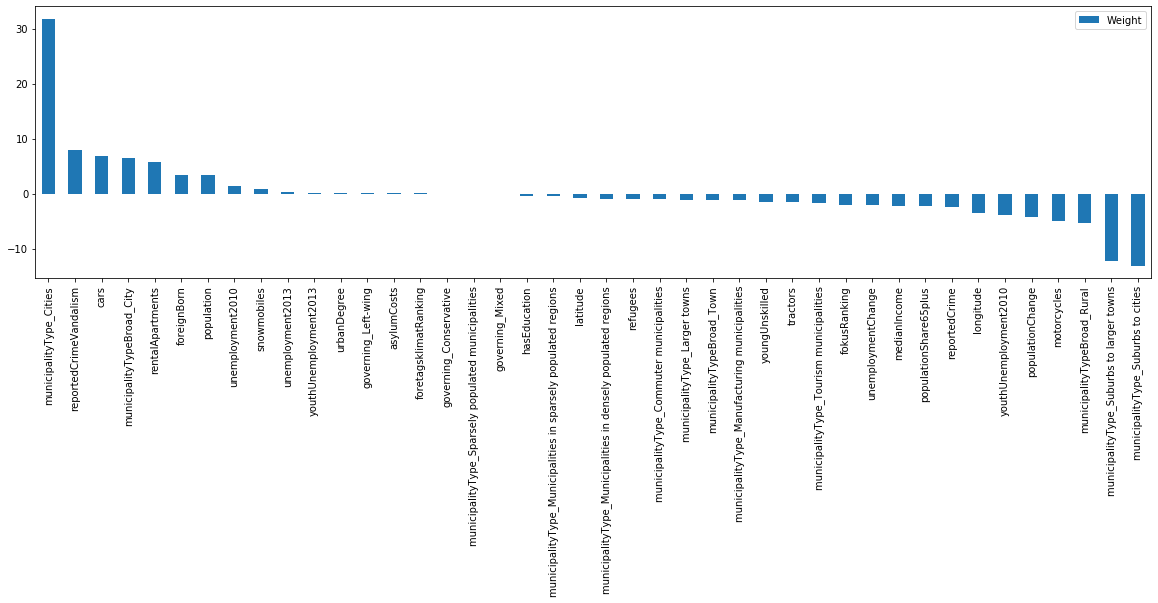

In [39]:
df = pd.DataFrame({'Weight': model.coef_,
                   'Column': indicators_attributes.columns}, index=indicators_attributes.columns)
df = df.sort_values(by = "Weight", ascending=False)
ax = df.plot.bar(figsize = (20,5), rot = 90)

As expected municipality type City and so as population is highly correlated to fire cases, also reported crime vandalism is not surprising to be correlated. May be interesting note is how fire cases are correlated to rentalApartments and medianIncome.

To rate our model it would be nice to see some of the following scores:

The coefficient of determination $R$$^{2}$ compares the fit of the chosen model with that of a horizontal straight line (the null hypothesis). It is computed as $1−\frac{SSres}{SStot}$. (here, $SSres$ = residual error.)

In [40]:
model.score(indicators_attributes_train, indicators_target_train)

0.7446398487227024

In [41]:
model.score(indicators_attributes_test, indicators_target_test)

0.5308827495012378

Not impressive performance as a whole. The model probably underfits the data. Another metric to see is the MSE - It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points. 

In [42]:
mean_squared_error(indicators_target_train, model.predict(indicators_attributes_train))

15.907309162017704

In [43]:
mean_squared_error(indicators_target_test, model.predict(indicators_attributes_test))

5.033667144471854

##### The right way

Actually analysing a model without a validation set and cross validation is not a good idea, even more when data observations are few. The results above could be just a luck and are not representative. We could have a situation where the training and/or testing sets (which are samples taken from the overall sample) look meaningfully different from the overall sample. If that were the case, we run the risk of having a “garbage in, garbage out” situation, and our model may perform poorly $^{[7]}$. Usually, this comes into play for categorical variables, but when we do it for continuous variables we could do it by creating bins, and passing our `y` variable into an ndarray containing those bins and the corresponding values. In our case `fireCases` varies in range 0 to 91 and got only 22 unique values. Thus the process of binning would not be so effective and in terms of representative results I would rely on cross validation only.

Most algotithms improve their parameters based on the test scores, this means knowledge of test data may "leak" into the algorithm and overfit the data. It is important to use cross validation and each time train with k-1 folds and test with the other fold. In order to choose the best combination of hyperparameters we would use `GridSearchCV()`. This is a library function that is a member of sklearn's `model_selection` package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

In [44]:
model_elastic_net = ElasticNet()
parameters_elastic_net = {
    "alpha": [1e-3, 1e-2, 1e-1],
    "l1_ratio": [0.01, 0.1, 0.5, 1, 2],
    "fit_intercept": [True, False]
}
grid_search = GridSearchCV(model_elastic_net, param_grid = parameters_elastic_net, cv = 3)
grid_search.fit(indicators_attributes_train, indicators_target_train)

print(grid_search.best_estimator_)
print("r2 / variance : ", grid_search.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_search.predict(indicators_attributes_test) - indicators_target_test) ** 2))

C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9464166942937027, tolerance: 1.0454735483870967
  positive)
C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 0.4620155844155844
  positive)
C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727.7862472333932, tolerance: 0.5362
  positive)
C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1686.9

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=False, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r2 / variance :  0.47689815103541355
Residual sum of squares: 4.48


C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 1.1416
  positive)
C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:788: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


In [45]:
regressor_indicators = grid_search.best_estimator_
print(regressor_indicators.score(indicators_attributes_train, indicators_target_train))
print(regressor_indicators.score(indicators_attributes_test, indicators_target_test))

0.7139713630812228
0.5821902402879352


In [46]:
grid_search.cv_results_

{'mean_fit_time': array([0.02500423, 0.01766268, 0.01766435, 0.00466283, 0.01499685,
        0.01566442, 0.01599971, 0.01832859, 0.01699932, 0.01499629,
        0.00333365, 0.00300042, 0.00300097, 0.00332586, 0.01233045,
        0.01566482, 0.01366234, 0.00999594, 0.00733161, 0.0126574 ,
        0.0023334 , 0.00266767, 0.00199986, 0.0019989 , 0.00834044,
        0.00466553, 0.00366569, 0.00299827, 0.00266743, 0.0086503 ]),
 'std_fit_time': array([3.26176027e-03, 3.39934938e-03, 6.84789353e-03, 4.71089626e-04,
        1.17340271e-06, 4.70755833e-04, 1.17340271e-06, 2.35579858e-03,
        8.17897413e-04, 1.03008599e-06, 4.70303127e-04, 4.05233662e-07,
        1.94667955e-07, 4.60300039e-04, 1.68293951e-03, 4.72725827e-04,
        9.41223547e-04, 1.41444825e-03, 4.69690289e-04, 4.64880137e-03,
        4.71707569e-04, 4.72045346e-04, 1.94667955e-07, 9.73339773e-07,
        4.82272378e-04, 4.71651343e-04, 4.71707569e-04, 8.99132768e-07,
        4.71876367e-04, 4.61255274e-04]),
 'mean_scor

The score varies a lot. This may be due to the small amount of data.

As number of school fire cases depend mainly on population, we could see a model on the file `fires`. There is more observations included and may be modelling would perform better.

In [47]:
fires = fires.drop("Year", axis = 1)
fires = fires.set_index('Municipality')
fires

,Cases,Population
Municipality,,
Ale,0,25292
Alingsås,0,34930
Alvesta,0,19171
Aneby,0,6806
Arboga,0,14070
...,...,...
Österåker,0,41180
Östhammar,0,21374
Östra Göinge,0,13864


In [48]:
fires_target = fires["Cases"]
fires_attributes = fires.drop(["Cases"], axis = 1)

In [49]:
fires_attributes_train, fires_attributes_test, fires_target_train, fires_target_test = train_test_split(
    fires_attributes, fires_target, test_size=0.2)

In [50]:
grid_search_fires = GridSearchCV(model_elastic_net, param_grid = parameters_elastic_net, cv = 2)
grid_search_fires.fit(fires_attributes_train, fires_target_train)

print(grid_search_fires.best_estimator_)
print("r2 / variance : ", grid_search_fires.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_search_fires.predict(fires_attributes_test) - fires_target_test) ** 2))

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=2,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r2 / variance :  0.525347838955688
Residual sum of squares: 5.15


In [51]:
grid_search_fires.cv_results_

{'mean_fit_time': array([0.0039984 , 0.00350451, 0.00449169, 0.00300121, 0.00299883,
        0.00500846, 0.00248432, 0.00250161, 0.00250351, 0.00249946,
        0.00250363, 0.00300443, 0.00250101, 0.00249922, 0.00250101,
        0.00200939, 0.00248909, 0.00300252, 0.00199997, 0.00249898,
        0.00199938, 0.00199938, 0.00249696, 0.00200009, 0.00199962,
        0.00199687, 0.00200057, 0.00201154, 0.00200069, 0.00198662]),
 'std_fit_time': array([1.00028515e-03, 1.50227547e-03, 1.50644779e-03, 1.19209290e-06,
        9.99212265e-04, 3.57627869e-06, 4.87089157e-04, 4.99606133e-04,
        4.99367714e-04, 5.00798225e-04, 5.03540039e-04, 2.26497650e-06,
        5.00917435e-04, 4.99129295e-04, 5.00440598e-04, 1.07288361e-05,
        4.88281250e-04, 2.98023224e-06, 1.19209290e-07, 5.00798225e-04,
        7.15255737e-07, 9.53674316e-07, 4.96625900e-04, 0.00000000e+00,
        2.38418579e-07, 1.78813934e-06, 7.15255737e-07, 1.16825104e-05,
        3.57627869e-07, 1.22785568e-05]),
 'mean_scor

In [52]:
regressor_fires = grid_search_fires.best_estimator_
print(regressor_fires.score(fires_attributes_train, fires_target_train))
print(regressor_fires.score(fires_attributes_test, fires_target_test))

0.525143683764024
0.41525253293851005


The result does not vary significantly and also the low score shows that the model didn't fit the data well. But the scores are not varing that much, so this is a nice example of tha fact that as we have more data, the we get more stable results. Let's try `PolynomialFeatures` on `indicators`:

In [53]:
polynomial = PolynomialFeatures(degree = 2, interaction_only = True).fit(indicators_attributes_train)

In [54]:
indicators_attributes_poly_train = polynomial.transform(indicators_attributes_train)
indicators_attributes_poly_test = polynomial.transform(indicators_attributes_test)

In [55]:
parameters_poly = {
    "alpha": [1e-3, 1e-2, 1e-1],
    "l1_ratio": [0.01, 0.1, 0.5, 1, 2],
    "fit_intercept": [True, False]
}

grid_search = GridSearchCV(ElasticNet(), param_grid = parameters_poly, cv = 3)

In [56]:
grid_search.fit(indicators_attributes_poly_train, indicators_target_train)

C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172.89867790695746, tolerance: 0.4620155844155844
  positive)
C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307.1451258461825, tolerance: 1.37468
  positive)
C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123.76332632487342, tolerance: 1.0454735483870967
  positive)
C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216.6906436800419, tolerance: 1.0454735483870967
  positive)
C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135.5042380572295, tolerance: 0.4620155844155844
  positive)
C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.53436147395212, tolerance: 1.37468
  positive)
C:\Users\PC-Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

GridSearchCV(cv=3, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.01, 0.1, 0.5, 1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
print(grid_search.best_estimator_)
print("r2 / variance : ", grid_search.best_score_)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=False, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r2 / variance :  0.44181424914791156


In [58]:
grid_search.cv_results_

{'mean_fit_time': array([0.30166372, 0.30567265, 0.25133419, 0.22245423, 0.16730666,
        0.32233469, 0.28998605, 0.24000676, 0.1593411 , 0.13266333,
        0.29666853, 0.25533621, 0.15233374, 0.06632916, 0.11299904,
        0.28233512, 0.24867694, 0.17067591, 0.08500059, 0.10666609,
        0.09499876, 0.03666584, 0.01266646, 0.02466448, 0.10966611,
        0.27866626, 0.20133368, 0.04433759, 0.03201079, 0.11833278]),
 'std_fit_time': array([0.00623594, 0.02747325, 0.02260137, 0.04354789, 0.02740385,
        0.01922543, 0.01069921, 0.01142428, 0.01368758, 0.01144351,
        0.00754024, 0.01319951, 0.02288203, 0.02823906, 0.00454748,
        0.00899436, 0.01250121, 0.00896239, 0.02566442, 0.00330202,
        0.01359095, 0.0024909 , 0.0004707 , 0.02148478, 0.00817967,
        0.00873111, 0.02004177, 0.01065596, 0.01484571, 0.01111689]),
 'mean_score_time': array([0.00099929, 0.00200701, 0.00166496, 0.00099929, 0.00166535,
        0.00199882, 0.00168133, 0.00099381, 0.00166774, 0.00

It is obvious that municipalities with small population got 5 or less fire cases for the period of 2010 to 2013. Also municipalities with more than 200 000 inhabitants got 20 or more fire cases for the period. We could perform modelling on the data in between and see if the model would perform better.

In [60]:
cut_indicators = indicators[indicators["population"] > 20_000]
cut_indicators = indicators[indicators["population"] < 200_000]

cut_indicators_target = cut_indicators["fireCases"]
cut_indicators_attributes = cut_indicators.drop(["fireCases", "fireCases2010", "fireCases2013"], axis = 1)

In [61]:
cut_indicators_attributes_train, cut_indicators_attributes_test, cut_indicators_target_train, cut_indicators_target_test = train_test_split(
    cut_indicators_attributes, cut_indicators_target, test_size=0.2)

In [64]:
pipe = Pipeline([("scaler",MinMaxScaler()), ("linreg",LinearRegression())])
pipe.fit(cut_indicators_attributes_train, cut_indicators_target_train)
Pipeline(steps=[("scaler", MinMaxScaler()), ("linreg",LinearRegression())])

pipe.score(cut_indicators_attributes_test, cut_indicators_target_test)

0.49452111519599434

Cutting the dataset did not came out with an impressive result.

In [62]:
# This part also did not get a good result. Also takes time, so I commented it.

# pipe = Pipeline([("scaler", MinMaxScaler()), ("poly", PolynomialFeatures(degree = 3, interaction_only = True)), ("elasticnet", ElasticNet())])
# pipe.fit(cut_indicators_attributes_train, cut_indicators_target_train)
# Pipeline(steps=[("scaler", MinMaxScaler()), ("poly", PolynomialFeatures(degree = 3, interaction_only = True)), ("elasticnet", ElasticNet())])

# param_grid_pipe = {
#     "elasticnet__alpha": [1e-3, 1e-2, 1e-1],
#     "elasticnet__l1_ratio": [0.01, 0.1, 0.5, 1, 2],
#     "elasticnet__fit_intercept": [True, False]
# }

# search = GridSearchCV(pipe, param_grid = param_grid_pipe, cv = 3)
# search.fit(cut_indicators_attributes_train, cut_indicators_target_train)

# print("Best parameter (CV score=%0.3f):" % search.best_score_)
# print(search.best_estimator_)

# print(pipe.score(cut_indicators_attributes_test, cut_indicators_target_test))

### 7. Conclusion

### References

[1] School fires in Sweden 1998-2014 - https://www.kaggle.com/mikaelhuss/swedish-school-fires

[2] Election-night-at-Aftonbladet - https://github.com/jensfinnas/Election-night-at-Aftonbladet

[3] Swedish Civil Contingencies Agency - https://ida.msb.se/ida2#page=a0087

[4] Kolada - Swedish municipality and county council statistics - https://www.kolada.se/

[5] Svenska Transport Analysis - https://www.trafa.se/en/road-traffic/vehicle-statistics/

[6] Seaborn - https://seaborn.pydata.org/

[7] Why, How and When to Scale your Features - https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e

[8] Stratifying a Continuous Target Variable - https://michaeljsanders.com/2017/03/24/stratify-continuous-variable.html

[9] Spatial data on map - http://maxberggren.se/2016/07/14/atomic-parts-of-town-names/

[10] An Introduction to Support Vector Regression (SVR) - https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

[11] Pipeline - https://python-data-science.readthedocs.io/en/latest/normalisation.html

[12] Putting it all together - https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

[13] Params for pipeline - https://www.dezyre.com/recipes/create-and-optimize-baseline-elasticnet-regression-model

[14] The Right Way to Oversample in Predictive Modeling - https://beckernick.github.io/oversampling-modeling/